In [1]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import gridspec
from matplotlib import rc
rc('text', usetex=True)
from collections import OrderedDict

#para plotear con más estilos de linea
linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

In [2]:
def ploteo_mecanismo(nombre, l, theta1, theta2, theta3, theta4):
    t2=np.rad2deg(theta2)
    X1=np.array([0, l[0]*np.cos(theta2), l[0]*np.cos(theta2)+l[1]*np.cos(theta3), l[3]*np.cos(theta1), 0])
    Y1=np.array([0, l[0]*np.sin(theta2), l[0]*np.sin(theta2)+l[1]*np.sin(theta3), l[3]*np.sin(theta1), 0])
    plt.plot(X1, Y1, color='blue', linestyle='solid')
    plt.scatter(X1, Y1, color='darkorange')
    #plt.plot(X2, Y2, color='blue', label='Configuración deseada')
    #plt.scatter(X2 ,Y2, color='darkorange')
    plt.title('Configuraciones del mecánismo de 4 barras para $\Theta_2$='+str("{0:.2f}".format(round(np.rad2deg(theta2)))), fontsize=14)
    plt.tick_params(labelsize=14)
    plt.xlabel('Coordenada X(mm)', fontsize=14)
    plt.ylabel('Coordenada Y(mm)', fontsize=14)
    plt.savefig(nombre)
    plt.show()

In [3]:
def ploteo_1_graph(nombre, theta2, Y, titulo, xlabel, ylabel):
    plt.plot(np.rad2deg(theta2), Y)
    plt.title(titulo, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [4]:
def ploteo_2_graph(nombre, theta2, Y1, Y2, titulo, label1, label2, xlabel1, ylabel1, xlabel2, ylabel2):
    fig=plt.figure()
    gs = gridspec.GridSpec(2, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    fig.suptitle(titulo, fontsize=16)
    ax1.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    ax2.plot(np.rad2deg(theta2), Y2, label=label2)
    ax1.set_xlabel(xlabel1, fontsize=14)
    ax1.set_ylabel(ylabel1, fontsize=14)
    ax2.set_xlabel(xlabel2, fontsize=14)
    ax2.set_ylabel(ylabel2, fontsize=14)
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [5]:
def equations(semilla, *args):
    theta3, theta4 = semilla
    #arg0=a, arg1=b, arg2=c, arg3=d, arg4=theta1, arg4=theta2 ---> para no confundirse
    eq1=args[0]*np.cos(args[5])+args[1]*np.cos(theta3)-args[2]*np.cos(theta4)-args[3]*np.cos(args[4]) #esto puede cambiar según como orientes los ejes
    eq2=args[0]*np.sin(args[5])+args[1]*np.sin(theta3)-args[2]*np.sin(theta4)-args[3]*np.sin(args[4]) #same
    return [eq1, eq2]

In [6]:
def angulo_transmision(theta3, theta4):
    angulo=np.rad2deg(np.abs(theta3-theta4)) 
    if angulo>90: #por definición de ángulo de transmisión
        angulo=angulo-90
    return angulo
def u1(l): #def del libro
    u1=np.rad2deg(np.arccos((l[1]**2+l[2]**2-(l[3]+l[0])**2)/(2*l[1]*l[2])))
    if u1>90:
        u1=u1-90
    return u1
def u2(l): #la otra def del libro
    u2=np.rad2deg(np.arccos((l[1]**2+l[2]**2-(l[3]-l[0])**2)/(2*l[1]*l[2])))
    if u2>90:
        u2=u2-90
    return u2

In [7]:
#DATOS DE ENTRADA EN GENERAL

# apartado a
l1=1900
l2=300
l=l1-l2
h=1200
r1=np.sqrt(l**2+h**2) #largo del eslabón fijo

# apartado b
r2=1280
r3=2000
r4=350
sl=r4+r3
pq=r1+r2 #es de grashof
# es balancín-manivela ya que r1, que está fijo, es adyacente a r4, el más corto

# apartado c
theta1=np.arctan(h/l)+np.pi/2

#cosas usadas desp
theta2=0 #Esto es para obtener una solución en particular, todo lo que sea un array lo voy a llamar VARIABLE_lista
theta2_lista=np.linspace(0,2*np.pi,10000) #obtengo el array de theta2 para toda la vuelta de la manivela
d=r1
a=350
b=2000
c=1280 
e=1980 #longitud de O4-CG4
delta=np.deg2rad(14) #angulo que forma el eslabón 4 con el O4-CG4
l=[a, b, c, d] #armo lista de las longitudes
semilla=[0, 0] #para el solver de sist de ecuaciones no lineales, pongo semilla, esta anduvo flama.

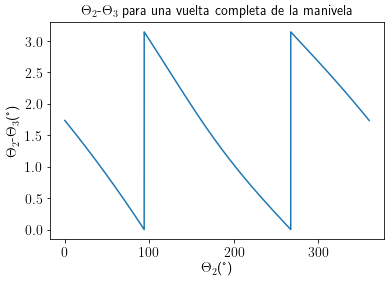

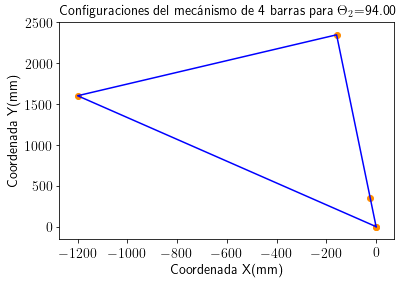

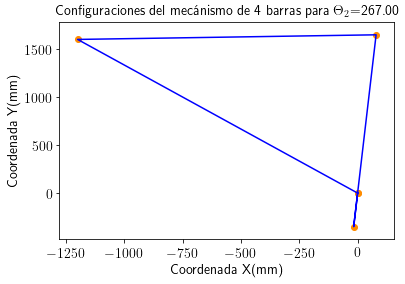

Los ángulos para la primer posición de agarrotamiento son:  [126.86989765  93.86138614  93.87923367  35.57279765]
Los ángulos para la segunda posición de agarrotamiento son:  [126.86989765 267.21872187  87.24647968   2.15371645]


In [8]:
# apartado d
[theta3, theta4]=fsolve(equations, semilla, (a, b, c, d, theta1, theta2)) #solucion al sistema no lineal acoplado para un resultado en particular
resultados = [fsolve(equations, semilla, (a, b, c, d, theta1, theta2)) for theta2 in theta2_lista] #no se porque no me dejaba guardar directamente theta 3 y theta 4
theta3_lista=[resultados[x][0] for x in range(len(resultados))] #asique lo separo acá
theta4_lista=[resultados[x][1] for x in range(len(resultados))] #vuelvo a separar
t3_m_t2=(theta3_lista-theta2_lista)%np.pi #modulo la diferencia, si no modulo solo encuentro la primera posición de agarrotamiento
ploteo_1_graph('dif_theta3_theta2.png', theta2_lista, t3_m_t2, '$\Theta_2$-$\Theta_3$ para una vuelta completa de la manivela', '$\Theta_2$(°)', '$\Theta_2$-$\Theta_3$(°)') #ploteo theta3-theta2

#la idea es encontrar el íindice para el cual la diferencia modulada es cero. Nunca es cero ya que estoy en un discreto, por lo que tengo que usar una tolerancia
index_0=[i for i, j in enumerate(t3_m_t2) if np.abs(j) <= 0.001] #obtengo los índices para los cuales theta3-theta2 = 0, hay que jugar un poco con la tolerancia dependiendo del tamaño del array de theta2_lista
ploteo_mecanismo('primeragarrotamiento.png', l, theta1, theta2_lista[index_0[0]], theta3_lista[index_0[0]], theta4_lista[index_0[0]]) #ploteo mecanismo para agarrotamiento
ploteo_mecanismo('segundoagarrotamiento.png', l, theta1, theta2_lista[index_0[1]], theta3_lista[index_0[1]], theta4_lista[index_0[1]]) #ploteo el mecanismo para agarrotamiento
print('Los ángulos para la primer posición de agarrotamiento son: ', np.rad2deg([theta1, theta2_lista[index_0[0]], theta3_lista[index_0[0]], theta4_lista[index_0[0]]])) #para leerlo rapido
print('Los ángulos para la segunda posición de agarrotamiento son: ', np.rad2deg([theta1, theta2_lista[index_0[1]], theta3_lista[index_0[1]], theta4_lista[index_0[1]]])) #para leerlo rapido

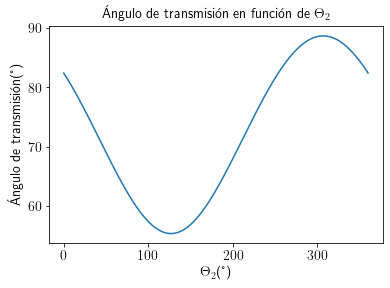

Un extremo del angulo de transmision es:  88.70290076069026
El otro extremo del angulo de transmision es:   55.2838165668862


In [9]:
# apartado e
angulo_transmision_lista=[angulo_transmision(theta3_lista[x], theta4_lista[x]) for x in range(len(theta3_lista))] #obtengo el vector de ángulos de transmisión
ploteo_1_graph('angulo_transmision.png', theta2_lista, angulo_transmision_lista, 'Ángulo de transmisión en función de $\Theta_2$', '$\Theta_2$(°)', 'Ángulo de transmisión(°)') #lo ploteo
u1=u1(l) #obtengo el primer valor extremo, como entrada van las longitudes de los eslabones ordenados correctamente
u2=u2(l) #obtengo el segundo valor extremo, same
print('Un extremo del angulo de transmision es: ', u1) #los printeo para lectura más rápida
print('El otro extremo del angulo de transmision es:  ', u2) #same

In [10]:
# apartado f
B_X=a*np.cos(theta2_lista)+b*np.cos(theta3_lista) #obtengo la componente X de B
B_Y=a*np.sin(theta2_lista)+b*np.sin(theta3_lista) #obtengo la componente Y de B
np.savetxt('B.txt', [[B_X[i], B_Y[i]] for i in range(len(theta2_lista))]) #Guardo las coordenadsa de B
maximo=max(B_Y) #obtengo el valor máximo de B
indice_maximo=[i for i, j in enumerate(B_Y) if j == maximo][0] #busco el indice de la lista en donde está el máximo de B
minimo=min(B_Y) #lo mismo para el mínimo
indice_minimo=[i for i, j in enumerate(B_Y) if j == minimo][0] #same
theta2_Bmax=theta2_lista[indice_maximo] #obtengo el ángulo theta2 de entrada para el máximo de B
theta2_Bmin=theta2_lista[indice_minimo] #same para el mínimo 
print('El angulo en el cual B_Y es maximo es: ', np.rad2deg(theta2_Bmax)) #lo printeo para leerlo rápido
print('El angulo en el cual B_Y es minimo es: ', np.rad2deg(theta2_Bmin)) #lo printeo para leerlo rápido
print('Indice para el cual el punto B esta lo mas abajo: ', indice_minimo)
print('Indice para el cual el punto B esta lo mas arriba: ', indice_maximo)

El angulo en el cual B_Y es maximo es:  93.86138613861387
El angulo en el cual B_Y es minimo es:  267.25472547254725
Indice para el cual el punto B esta lo mas abajo:  7423
Indice para el cual el punto B esta lo mas arriba:  2607


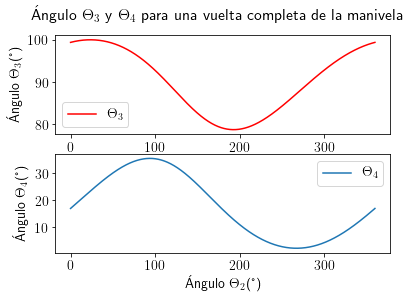

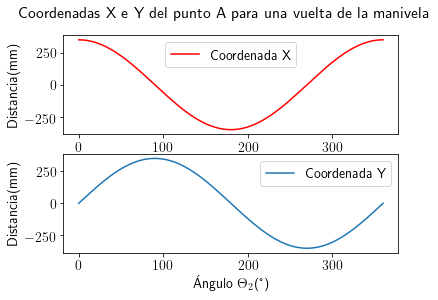

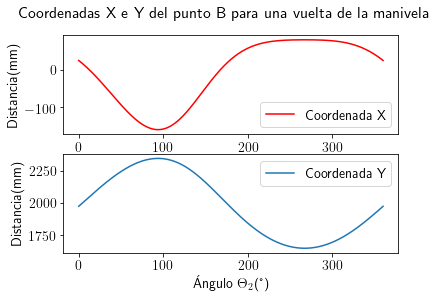

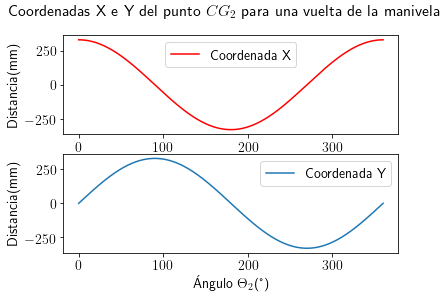

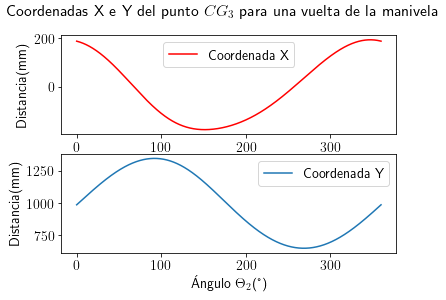

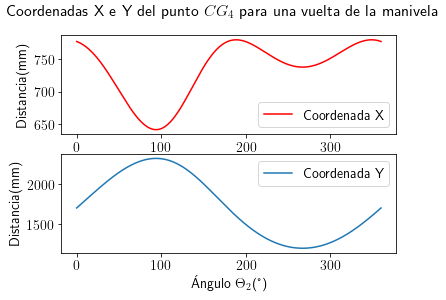

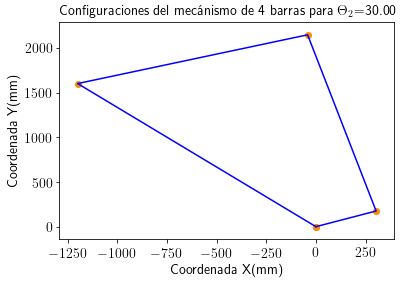

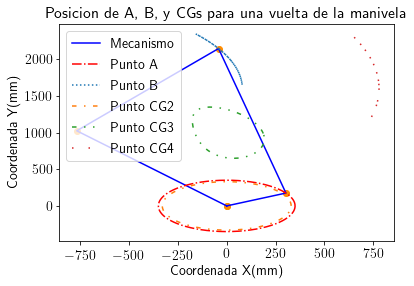

In [11]:
# apartado e
A_X=a*np.cos(theta2_lista) #obtengo X de A
A_Y=a*np.sin(theta2_lista) #obtengo Y de A
np.savetxt('A.txt', [[A_X[i], A_Y[i]] for i in range(len(theta2_lista))]) #guardo coordenadas de A
CG2_X=A_X*33/35 #X de CG2
CG2_Y=A_Y*33/35 #Y de CG2
np.savetxt('CG2.txt', [[CG2_X[i], CG2_Y[i]] for i in range(len(theta2_lista))]) #guardo coordenadas de CG2
CG3_X=A_X+b/2*np.cos(theta3_lista) #X de CG3
CG3_Y=A_Y+b/2*np.sin(theta3_lista) #Y de CG3
np.savetxt('CG3.txt', [[CG3_X[i], CG3_Y[i]] for i in range(len(theta2_lista))]) #guardo coordenadas de CG3
CG4_X=d*np.cos(theta1)+e*np.cos(theta4_lista-delta) #X de CG4
CG4_Y=d*np.sin(theta1)+e*np.sin(theta4_lista-delta) #Y de CG4
np.savetxt('CG4.txt', [[CG4_X[i], CG4_Y[i]] for i in range(len(theta2_lista))]) #guardo coordenadas de CG4

#strings para ploteo
titulotheta='Ángulo $\Theta_3$ y $\Theta_4$ para una vuelta completa de la manivela'
tituloA='Coordenadas X e Y del punto A para una vuelta de la manivela'
tituloB='Coordenadas X e Y del punto B para una vuelta de la manivela'
tituloCG2='Coordenadas X e Y del punto $CG_2$ para una vuelta de la manivela'
tituloCG3='Coordenadas X e Y del punto $CG_3$ para una vuelta de la manivela'
tituloCG4='Coordenadas X e Y del punto $CG_4$ para una vuelta de la manivela'
xlabel='Ángulo $\Theta_2$(°)'
labeltheta3='$\Theta_3$'
labeltheta4='$\Theta_4$'
labelX='Coordenada X'
labelY='Coordenada Y'
ylabeltheta3='Ángulo $\Theta_3$(°)'
ylabeltheta4='Ángulo $\Theta_4$(°)'
ylabeldistancia='Distancia(mm)'

#ploteo
ploteo_2_graph('theta3_theta4.png', theta2_lista, np.rad2deg(theta3_lista), np.rad2deg(theta4_lista), titulotheta, labeltheta3, labeltheta4, xlabel, ylabeltheta3, xlabel, ylabeltheta4)
ploteo_2_graph('puntoA.png', theta2_lista, A_X, A_Y, tituloA, labelX, labelY, xlabel, ylabeldistancia, xlabel, ylabeldistancia)
ploteo_2_graph('puntoB.png', theta2_lista, B_X, B_Y, tituloB, labelX, labelY, xlabel, ylabeldistancia, xlabel, ylabeldistancia)
ploteo_2_graph('puntoCG2.png', theta2_lista, CG2_X, CG2_Y, tituloCG2, labelX, labelY, xlabel, ylabeldistancia, xlabel, ylabeldistancia)
ploteo_2_graph('puntoCG3.png', theta2_lista, CG3_X, CG3_Y, tituloCG3, labelX, labelY, xlabel, ylabeldistancia, xlabel, ylabeldistancia)
ploteo_2_graph('puntoCG4.png', theta2_lista, CG4_X, CG4_Y, tituloCG4, labelX, labelY, xlabel, ylabeldistancia, xlabel, ylabeldistancia)

#ploteo de un ángulo en particular, en el tp te pide para 60 grados y 30 grados
theta2=np.pi/6
[theta3, theta4]=fsolve(equations, semilla, (a, b, c, d, theta1, theta2))
ploteo_mecanismo('theta_X.png', l, theta1, theta2, theta3, theta4)

#ploteo todos los puntos
X=np.array([0, a*np.cos(theta2), a*np.cos(theta2)+b*np.cos(theta3), c*np.cos(theta1), 0]) #para plotear el mecanismo
Y=np.array([0, a*np.sin(theta2), a*np.sin(theta2)+b*np.sin(theta3), c*np.sin(theta1), 0]) #same
plt.plot(X, Y, color='blue', linestyle='solid', label='Mecanismo')
plt.scatter(X ,Y, color='darkorange')
plt.tick_params(labelsize=14)
plt.xlabel('Coordenada X(mm)', fontsize=14)
plt.ylabel('Coordenada Y(mm)', fontsize=14)
plt.plot(A_X, A_Y, color='red', label='Punto A', linestyle='dashdot')
plt.plot(B_X, B_Y, label='Punto B', linestyle='dotted')
plt.plot(CG2_X, CG2_Y, label='Punto CG2', linestyle=linestyles['dashdotted'])
plt.plot(CG3_X, CG3_Y, label='Punto CG3', linestyle=linestyles['dashdotdotted'])
plt.plot(CG4_X, CG4_Y, label='Punto CG4', linestyle=linestyles['loosely dotted'])
plt.legend(fontsize=14)
plt.title('Posicion de A, B, y CGs para una vuelta de la manivela', fontsize=16)
plt.tick_params(labelsize=14)
plt.savefig('todoslospuntos.png')
plt.show()